In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Load the Iris dataset
iris = load_iris()
X = iris.data                #Feature matrix
y = iris.target                #Target vector (0, 1, 2 representing 3 flower types)


In [9]:
# Display basic dataset information

print("Feature names:", iris.feature_names )
print("Target classes:", iris.target_names)
print("Shape of data:", X.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Shape of data: (150, 4)


In [12]:
#Split the dataset into training and testing sets

X_train, X_test, y_train, y_test=train_test_split(
    X, y,
    test_size=0.3,            # 30% for testing
    random_state=42,
    stratify=y
)


In [16]:
#Initialize the Decision Tree model
model = DecisionTreeClassifier(
    criterion = 'entropy',      #Split based on Information Gain
    max_depth=3,              #Limit depth to avoid overfitting
    random_state=42
)
#Train (fit) the model
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [18]:
#Make predictions on the test set

y_pred = model.predict(X_test)

In [20]:
#Confusion matrix
#Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Display numerical matrix
print("\nConfusion Matrix (Raw Values)\n", cm)


Confusion Matrix (Raw Values)
 [[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


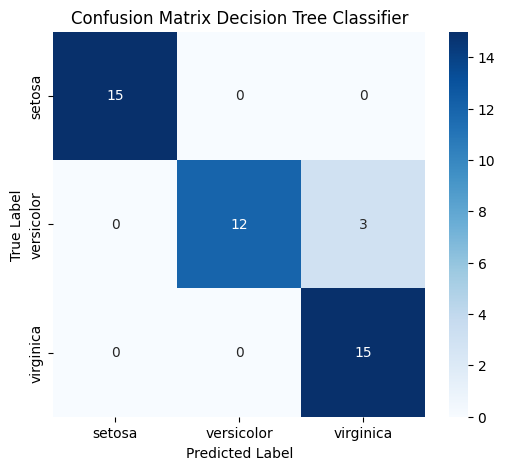

In [23]:
# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues',
            xticklabels = iris.target_names,
            yticklabels = iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Decision Tree Classifier")
plt.show()

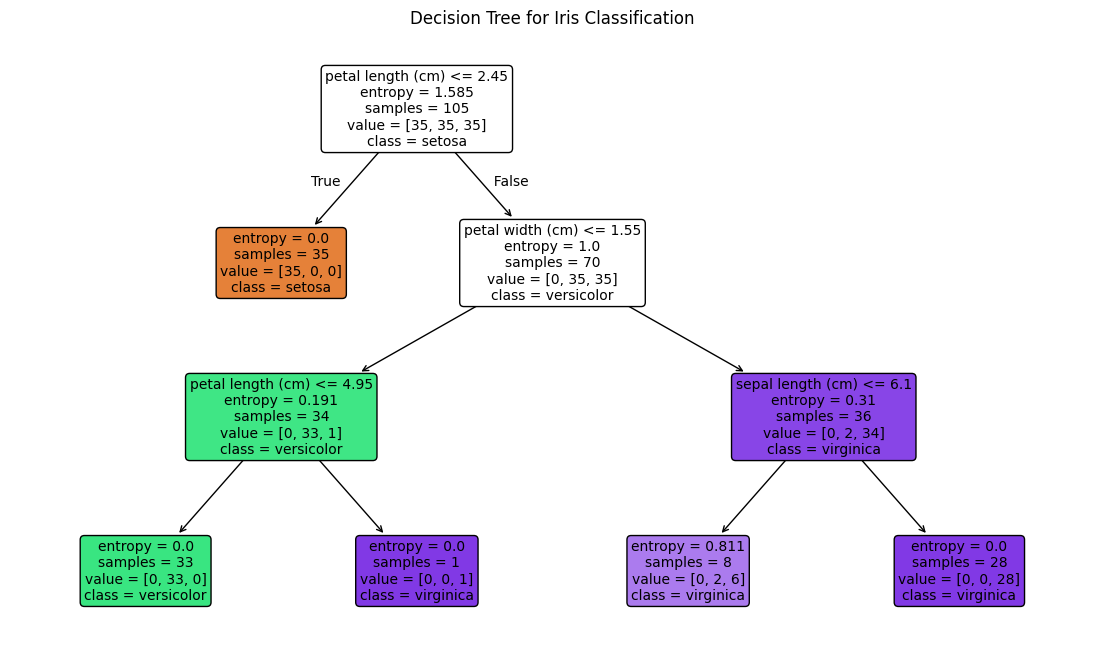

In [27]:
#Visualize the Decision Tree

plt.figure(figsize = (14, 8))

plot_tree(
    model,
    filled = True,
    rounded=True,
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    fontsize=10
)
plt.title("Decision Tree for Iris Classification")
plt.show()